In [16]:
import pandas as pd

**READING THE FIRST AND LAST 13 COMBINED DATASETS**

In [18]:
d1 = pd.read_csv("final_merged_data.csv")
d2 = pd.read_csv("final_merged_data_1.csv")

**CHECKING IF THE CONDITIONS ARE SATISFIED AND APPENDING ONCE AGAIN**

In [20]:
datasets = [d1,d2]
filtered_data = []
for df in datasets:
    df = df[df['year'] >= 2010]
    df = df[(df['age'] >= 12.5) & (df['age'] <= 42.5)]
    df = df[(df['gender'] == 0) | (df['gender'] == 1)]
    df = df[(df['region'] == 0) | (df['region'] == 1)]
    filtered_data.append(df)
    print(df.shape)


(762496, 13)
(680064, 13)


**DROPPING NULL VALUES**

In [22]:
cleaned_data = []
for df in filtered_data:
    cleaned_df = df.dropna()
    cleaned_data.append(cleaned_df)
    print(cleaned_df.isnull().sum())

superregion       0
country           0
age               0
gender            0
region            0
education         0
year              0
type              0
type_desc         0
median            0
upperci_95        0
lowerci_95        0
Dietary Factor    0
dtype: int64
superregion       0
country           0
age               0
gender            0
region            0
education         0
year              0
type              0
type_desc         0
median            0
upperci_95        0
lowerci_95        0
Dietary Factor    0
dtype: int64


**CHECKING FOR DUPLICATES**

In [24]:
for df in cleaned_data:
    initial_shape = df.shape
    df.drop_duplicates(inplace=True)
    final_shape = df.shape
    print(f"Initial shape: {initial_shape}, Final shape after removing duplicates: {final_shape}")


Initial shape: (762496, 13), Final shape after removing duplicates: (762496, 13)
Initial shape: (680064, 13), Final shape after removing duplicates: (680064, 13)


**MERGING THE CLEANED DATA AS ON SINGLE DATASET**

In [26]:
complete_merged_data = pd.concat(cleaned_data, ignore_index=True)
print("Final merged data shape:", complete_merged_data.shape)

Final merged data shape: (1442560, 13)


**CHECKING HOW THE DATASET LOOKS AFTER ALL PREPROCESSING**

In [28]:
complete_merged_data.head()

,superregion,country,age,gender,region,education,year,type,type_desc,median,upperci_95,lowerci_95,Dietary Factor
0,SAARC,AFG,12.5,0,0,1,2010,1,1: Foods & Beverages,51.014353,108.602472,24.675886,Fruits
1,SAARC,AFG,12.5,0,0,2,2010,1,1: Foods & Beverages,74.446074,153.614374,35.747700,Fruits
2,SAARC,AFG,12.5,0,0,3,2010,1,1: Foods & Beverages,98.372271,203.371350,49.117662,Fruits
3,SAARC,AFG,12.5,0,0,999,2010,1,1: Foods & Beverages,65.600050,108.890752,40.510834,Fruits
4,SAARC,AFG,12.5,0,1,1,2010,1,1: Foods & Beverages,70.474873,144.297376,33.755312,Fruits


In [29]:
complete_merged_data.tail()

,superregion,country,age,gender,region,education,year,type,type_desc,median,upperci_95,lowerci_95,Dietary Factor
1442555,SSA,ZWE,42.5,1,0,999,2018,1,1: Foods & Beverages,43.639788,50.604317,37.464904,Total Milk
1442556,SSA,ZWE,42.5,1,1,1,2018,1,1: Foods & Beverages,43.553307,50.627141,37.359522,Total Milk
1442557,SSA,ZWE,42.5,1,1,2,2018,1,1: Foods & Beverages,67.644589,78.568869,58.364464,Total Milk
1442558,SSA,ZWE,42.5,1,1,3,2018,1,1: Foods & Beverages,111.776830,129.675729,95.783783,Total Milk
1442559,SSA,ZWE,42.5,1,1,999,2018,1,1: Foods & Beverages,68.176114,78.996556,58.654235,Total Milk


In [30]:
complete_merged_data.dtypes

superregion        object
country            object
age               float64
gender              int64
region              int64
education           int64
year                int64
type                int64
type_desc          object
median            float64
upperci_95        float64
lowerci_95        float64
Dietary Factor     object
dtype: object

**CONVERTING TO CSV WE FILE TO SAVE A COPY OF THE MERGED DATA**

In [32]:
complete_merged_data.to_csv('complete_merged_data.csv', index=False)

**CHANGING THE OBJECT DATA TYPES TO CATEGORICAL DATA TYPE**

In [34]:
categorical_columns = ['superregion', 'country', 'type_desc', 'Dietary Factor']
for col in categorical_columns:
    complete_merged_data[col] = complete_merged_data[col].astype('category')

complete_merged_data.dtypes

superregion       category
country           category
age                float64
gender               int64
region               int64
education            int64
year                 int64
type                 int64
type_desc         category
median             float64
upperci_95         float64
lowerci_95         float64
Dietary Factor    category
dtype: object

In [35]:
complete_merged_data.head()

,superregion,country,age,gender,region,education,year,type,type_desc,median,upperci_95,lowerci_95,Dietary Factor
0,SAARC,AFG,12.5,0,0,1,2010,1,1: Foods & Beverages,51.014353,108.602472,24.675886,Fruits
1,SAARC,AFG,12.5,0,0,2,2010,1,1: Foods & Beverages,74.446074,153.614374,35.747700,Fruits
2,SAARC,AFG,12.5,0,0,3,2010,1,1: Foods & Beverages,98.372271,203.371350,49.117662,Fruits
3,SAARC,AFG,12.5,0,0,999,2010,1,1: Foods & Beverages,65.600050,108.890752,40.510834,Fruits
4,SAARC,AFG,12.5,0,1,1,2010,1,1: Foods & Beverages,70.474873,144.297376,33.755312,Fruits


**DISPLAYING THE STATISTICS OF THE DATASET**

In [37]:
complete_merged_data.describe()

,age,gender,region,education,year,type,median,upperci_95,lowerci_95
count,1.442560e+06,1442560.0,1.442560e+06,1.442560e+06,1.442560e+06,1.442560e+06,1.442560e+06,1.442560e+06,1.442560e+06
mean,2.750000e+01,0.5,5.027174e-01,2.939786e+02,2.014414e+03,1.828571e+00,2.485838e+02,4.833652e+02,1.549459e+02
std,1.000000e+01,0.5,4.999928e-01,4.537089e+02,3.344476e+00,8.275859e-01,5.946123e+02,1.088102e+03,4.202142e+02
min,1.250000e+01,0.0,0.000000e+00,1.000000e+00,2.010000e+03,1.000000e+00,1.996325e-86,2.040454e-65,4.171512e-153
25%,1.750000e+01,0.0,0.000000e+00,2.000000e+00,2.010000e+03,1.000000e+00,1.137556e+01,2.158590e+01,4.315412e+00
50%,2.750000e+01,0.5,1.000000e+00,3.000000e+00,2.015000e+03,2.000000e+00,5.371864e+01,8.863266e+01,3.262051e+01
75%,3.750000e+01,1.0,1.000000e+00,9.990000e+02,2.018000e+03,3.000000e+00,1.639208e+02,2.831547e+02,1.064168e+02
max,4.250000e+01,1.0,1.000000e+00,9.990000e+02,2.020000e+03,3.000000e+00,8.278156e+03,9.331164e+03,7.370166e+03


**REMOVING ALL THE OUTLIERS**

In [38]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = complete_merged_data[(complete_merged_data[col] >= lower_bound) & (complete_merged_data[col] <= upper_bound)]
    return df

numeric_columns = ['age', 'median', 'upperci_95', 'lowerci_95']
data_no_outliers = remove_outliers(complete_merged_data, numeric_columns)

data_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1111058 entries, 0 to 1442559
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   superregion     1111058 non-null  category
 1   country         1111058 non-null  category
 2   age             1111058 non-null  float64 
 3   gender          1111058 non-null  int64   
 4   region          1111058 non-null  int64   
 5   education       1111058 non-null  int64   
 6   year            1111058 non-null  int64   
 7   type            1111058 non-null  int64   
 8   type_desc       1111058 non-null  category
 9   median          1111058 non-null  float64 
 10  upperci_95      1111058 non-null  float64 
 11  lowerci_95      1111058 non-null  float64 
 12  Dietary Factor  1111058 non-null  category
dtypes: category(4), float64(4), int64(5)
memory usage: 90.1 MB


**UNDERSAMPLING TO REDUCE THE DATASET SIZE**

In [86]:
if 'type' in data_no_outliers .columns:
    target_column = 'type'
    min_class_count = data_no_outliers [target_column].value_counts().min()

    reduced_data = data_no_outliers .groupby(target_column, group_keys=False).apply(
        lambda x: x.sample(min_class_count, random_state=42)
    )
else:
    reduced_data = data_no_outliers .sample(frac=0.1, random_state=42)

reduced_data_size = reduced_data.shape
reduced_data_head = reduced_data.head()

reduced_data_size, reduced_data_head

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/339934749.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



((123147, 13),
        superregion country   age  gender  region  education  year  type  \
 12240          LAC     COL  22.5       0       0          1  2015     1   
 404639         SSA     CPV  37.5       1       1        999  2018     1   
 244635         LAC     VEN  17.5       1       0        999  2010     1   
 535013        Asia     FSM  42.5       0       1          2  2018     1   
 263163        MENA     SAU  32.5       0       0        999  2020     1   
 
                    type_desc     median  upperci_95  lowerci_95  \
 12240   1: Foods & Beverages  85.963865   96.107533   76.177156   
 404639  1: Foods & Beverages  18.944613   62.024098    6.587316   
 244635  1: Foods & Beverages  52.757141  116.918443   12.906015   
 535013  1: Foods & Beverages   0.360946    0.675548    0.192883   
 263163  1: Foods & Beverages  32.912761   66.832595   16.990753   
 
                   Dietary Factor  
 12240                     Fruits  
 404639              Whole grains  
 244635  

**FURTHER REDUCTION OF THE DATASET**

In [89]:
reduction_fraction = 0.2  
further_reduced_data = reduced_data.sample(frac=reduction_fraction, random_state=42)

further_reduced_data_size = further_reduced_data.shape
further_reduced_data_head = further_reduced_data.head()

further_reduced_data_size, further_reduced_data_head

((24629, 13),
         superregion country   age  gender  region  education  year  type  \
 457166          HIC     BEL  37.5       1       1          3  2010     1   
 1302491         HIC     PRT  42.5       0       0        999  2015     3   
 396778          FSU     BGR  32.5       1       0          3  2015     1   
 702220          LAC     ARG  37.5       1       1          1  2015     2   
 180539          SSA     TZA  42.5       1       0        999  2010     1   
 
                     type_desc      median  upperci_95  lowerci_95  \
 457166   1: Foods & Beverages    2.405104    2.960393    1.934905   
 1302491     3: Micronutrients   93.939722  100.176284   88.234573   
 396778   1: Foods & Beverages   51.609042   80.318036   32.997854   
 702220      2: Macronutrients   10.168583   11.184527    9.250513   
 180539   1: Foods & Beverages  126.913918  159.231961   99.686809   
 
                 Dietary Factor  
 457166   Total processed meats  
 1302491              Vitamin C 

**CHECEKING THE UNIQUE VALUES**

In [41]:
for column in further_reduced_data.columns:
    print(f"Column: {column}")
    print(f"Unique Values ({len(further_reduced_data[column].unique())}):")
    print(further_reduced_data[column].unique(), "\n")

Column: superregion
Unique Values (7):
['LAC', 'SSA', 'Asia', 'MENA', 'HIC', 'FSU', 'SAARC']
Categories (7, object): ['Asia', 'FSU', 'HIC', 'LAC', 'MENA', 'SAARC', 'SSA'] 

Column: country
Unique Values (185):
['CRI', 'SWZ', 'IDN', 'YEM', 'TTO', ..., 'IRQ', 'CAF', 'NAM', 'NOR', 'ECU']
Length: 185
Categories (185, object): ['AFG', 'AGO', 'ALB', 'ARE', ..., 'YEM', 'ZAF', 'ZMB', 'ZWE'] 

Column: age
Unique Values (7):
[42.5 22.5 12.5 37.5 17.5 27.5 32.5] 

Column: gender
Unique Values (2):
[0 1] 

Column: region
Unique Values (2):
[1 0] 

Column: education
Unique Values (4):
[999   1   2   3] 

Column: year
Unique Values (4):
[2015 2010 2018 2020] 

Column: type
Unique Values (3):
[2 1 3] 

Column: type_desc
Unique Values (3):
['2: Macronutrients', '1: Foods & Beverages', '3: Micronutrients']
Categories (3, object): ['1: Foods & Beverages', '2: Macronutrients', '3: Micronutrients'] 

Column: median
Unique Values (129254):
[ 22.55189992 103.95408207  17.12921538 ...  83.43356043 102.428430

 **1.⁠ ⁠BARCHART ON FIRST TEN DIETARY FACTORS ACROSS DIFFERENT COUNTRIES**

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/4068915411.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_diet_counts = further_reduced_data.groupby(['country', 'Dietary Factor']).size().unstack(fill_value=0)


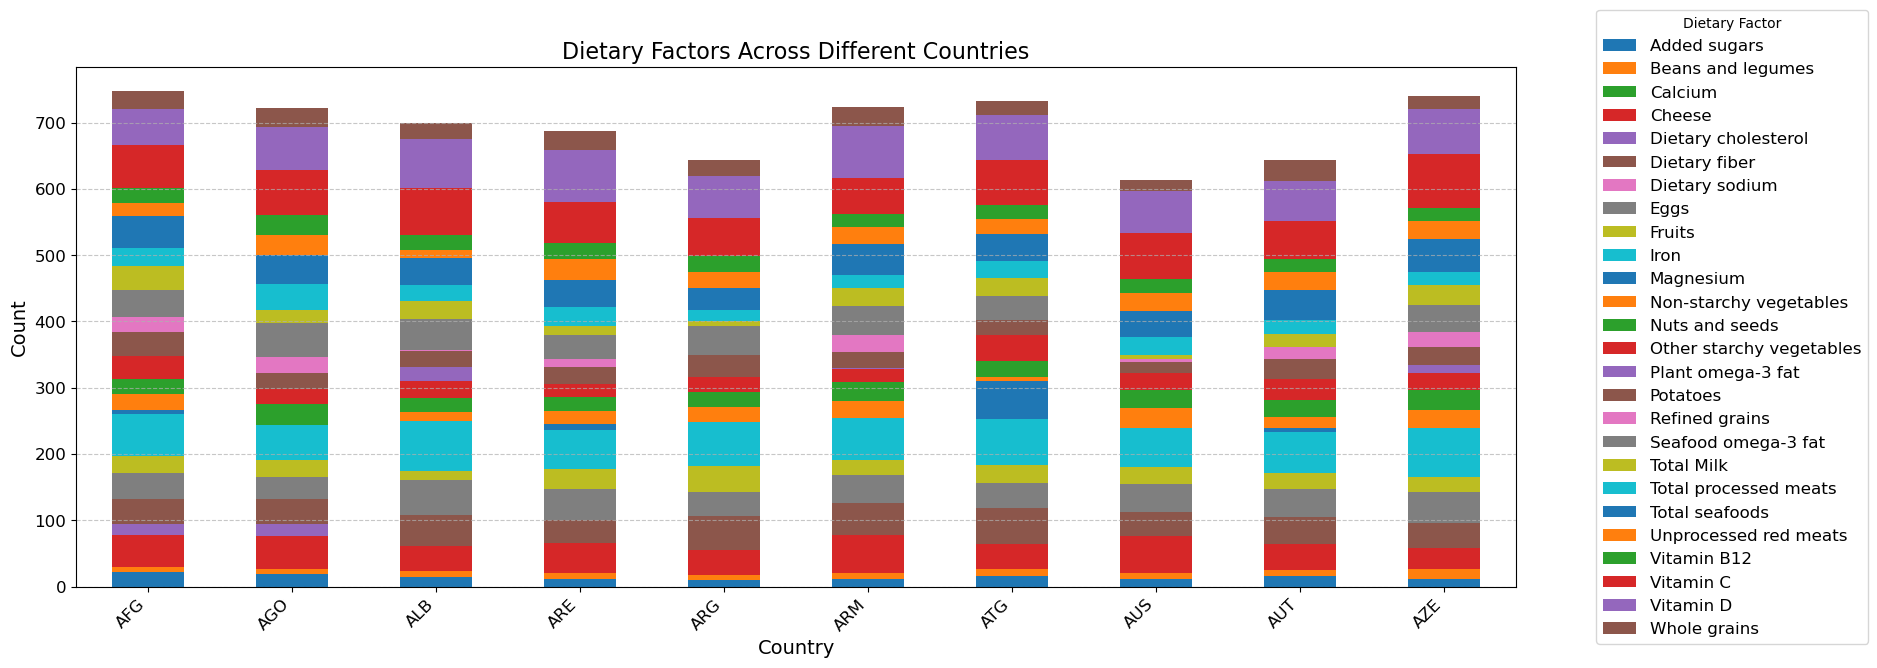

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 8))  
country_diet_counts = further_reduced_data.groupby(['country', 'Dietary Factor']).size().unstack(fill_value=0)
subset_data = country_diet_counts.head(10)
subset_data.plot(kind='bar', stacked=True, ax=ax)
plt.title('Dietary Factors Across Different Countries', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.05, right=0.85, top=0.85, bottom=0.2)
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=12, title="Dietary Factor")
plt.show()

**2. DISTRUBUTION OF FRUIT INTAKE ACROSS COUNTRIES**

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/1642049532.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')


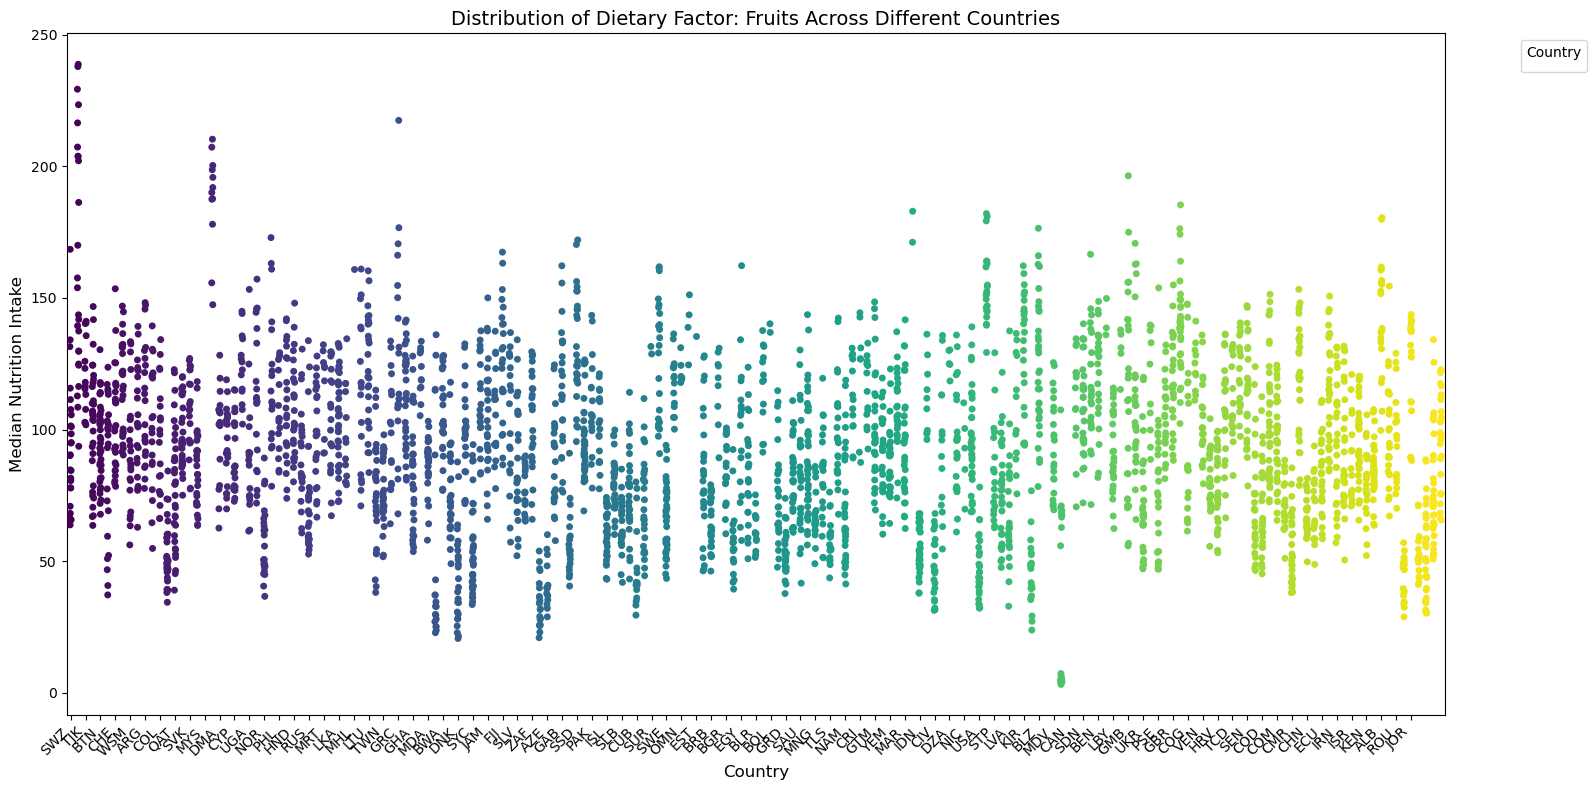

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
specific_factor = 'Fruits'  
data_specific = further_reduced_data[further_reduced_data['Dietary Factor'] == specific_factor]
plt.figure(figsize=(16, 8))  
sns.stripplot(data=data_specific, x='country', y='median', hue='country', jitter=True, palette='viridis')  
plt.xticks(ticks=range(0, len(data_specific['country'].unique()), 2), 
           labels=data_specific['country'].unique()[::2],  
           rotation=45, ha='right', fontsize=10)  
plt.title('Distribution of Dietary Factor: Fruits Across Different Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Median Nutrition Intake', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

**3. DISTRIBUTION OF NUTRITION INTAKE BY GENDER**

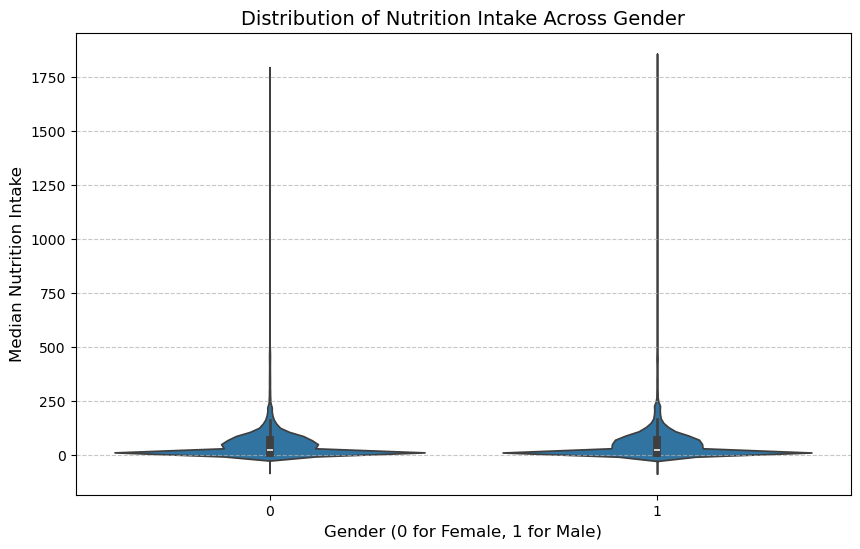

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='median', data=further_reduced_data, cut=12) 
plt.title('Distribution of Nutrition Intake Across Gender', fontsize=14)
plt.xlabel('Gender (0 for Female, 1 for Male)', fontsize=12)
plt.ylabel('Median Nutrition Intake', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**4. ANALYSIS OF AVERAGE DIET INTAKE TRENDS (2010-2020)**

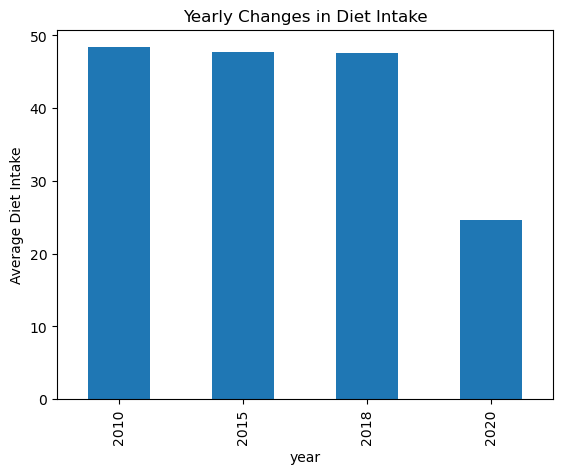

In [47]:
yearly_diet = further_reduced_data.groupby('year')['median'].mean()
yearly_diet.plot(kind='bar')
plt.title('Yearly Changes in Diet Intake')
plt.ylabel('Average Diet Intake')
plt.show()

**5. CORRELATION BETWEEN DIETARY FACTORS AND AVERAGE EDUCATION LEVELS**

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/3904197464.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/3904197464.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




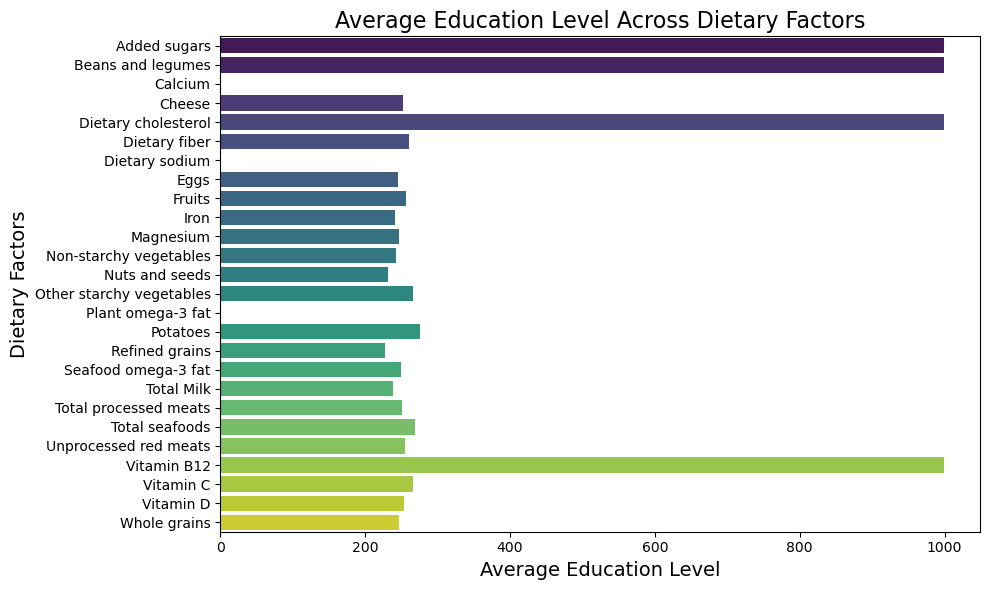

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
dietary_education_distribution = further_reduced_data.groupby('Dietary Factor')['education'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(
    x=dietary_education_distribution.values,
    y=dietary_education_distribution.index,
    palette='viridis'
)
plt.title('Average Education Level Across Dietary Factors', fontsize=16)
plt.xlabel('Average Education Level', fontsize=14)
plt.ylabel('Dietary Factors', fontsize=14)
plt.tight_layout()
plt.show()

**6. CORRELATION MATRIX OF AGE, YEAR, EDUCATION, AND NUTRITIONAL INTAKE**

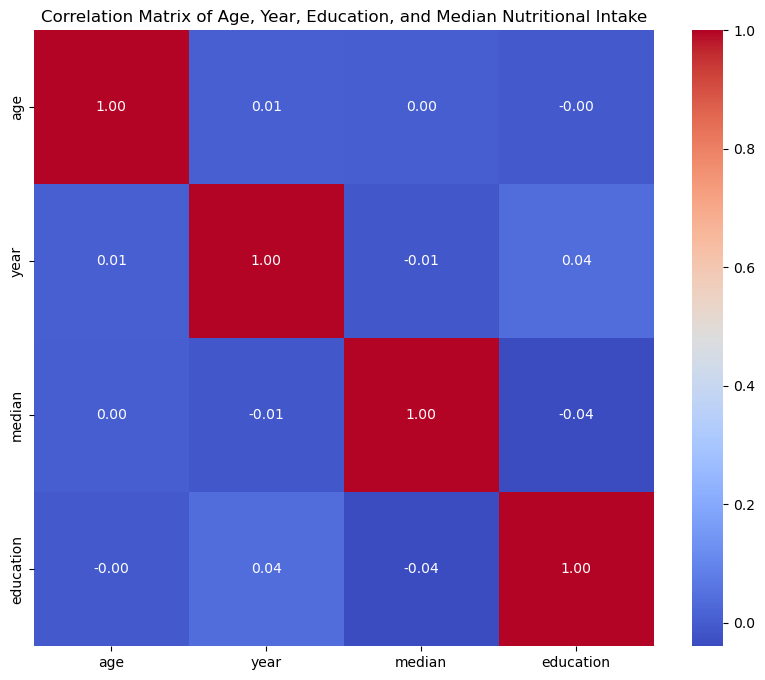

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = further_reduced_data[['age', 'year', 'median', 'education']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Age, Year, Education, and Median Nutritional Intake')
plt.show()

**7. DISTRIBUTION OF NUTRITION INTAKE BY GENDER ACROSS REGIONS**

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/1379534815.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



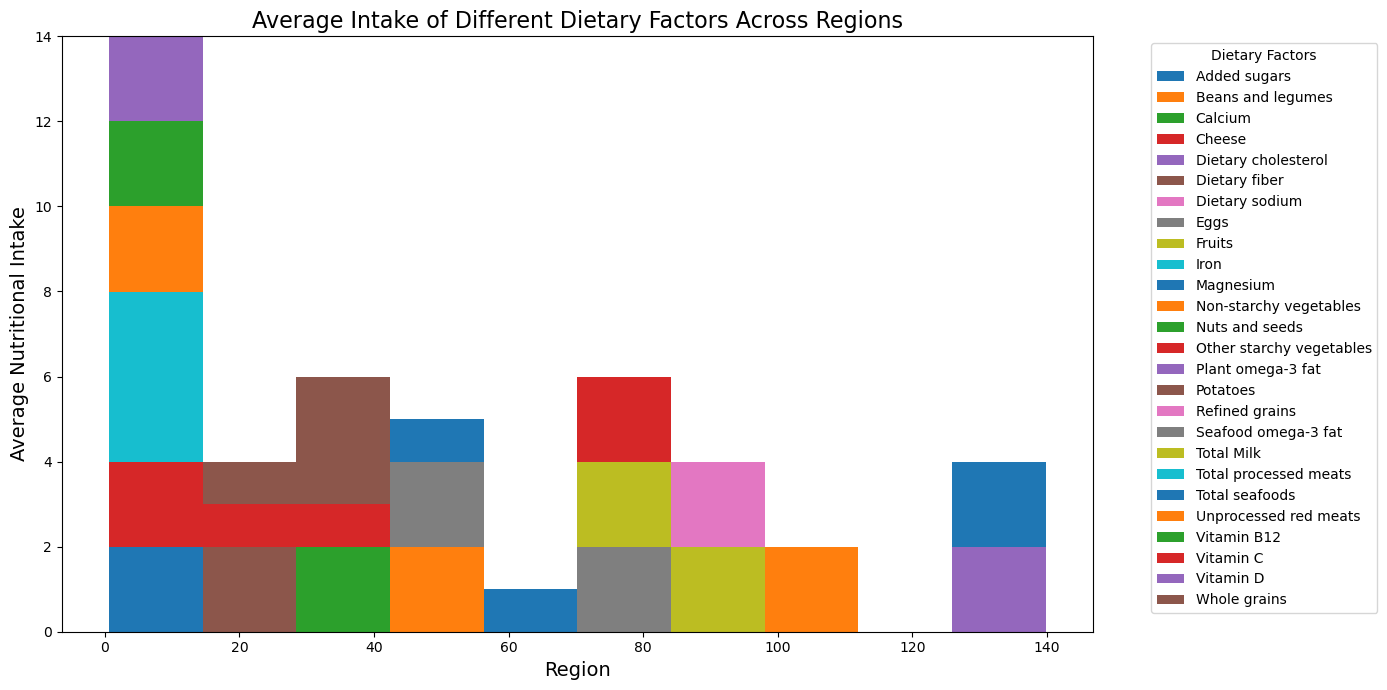

In [105]:
import matplotlib.pyplot as plt
grouped_data = further_reduced_data.groupby(['region', 'Dietary Factor'])['median'].mean().unstack()
ax = grouped_data.plot(kind='hist', stacked=True, figsize=(14, 7))
plt.title('Average Intake of Different Dietary Factors Across Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Nutritional Intake', fontsize=14)
plt.legend(title='Dietary Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**8. PAIRWISE RELATIONSHIPS AMONG AGE, INCOME, EDUCATION, AND YEAR**

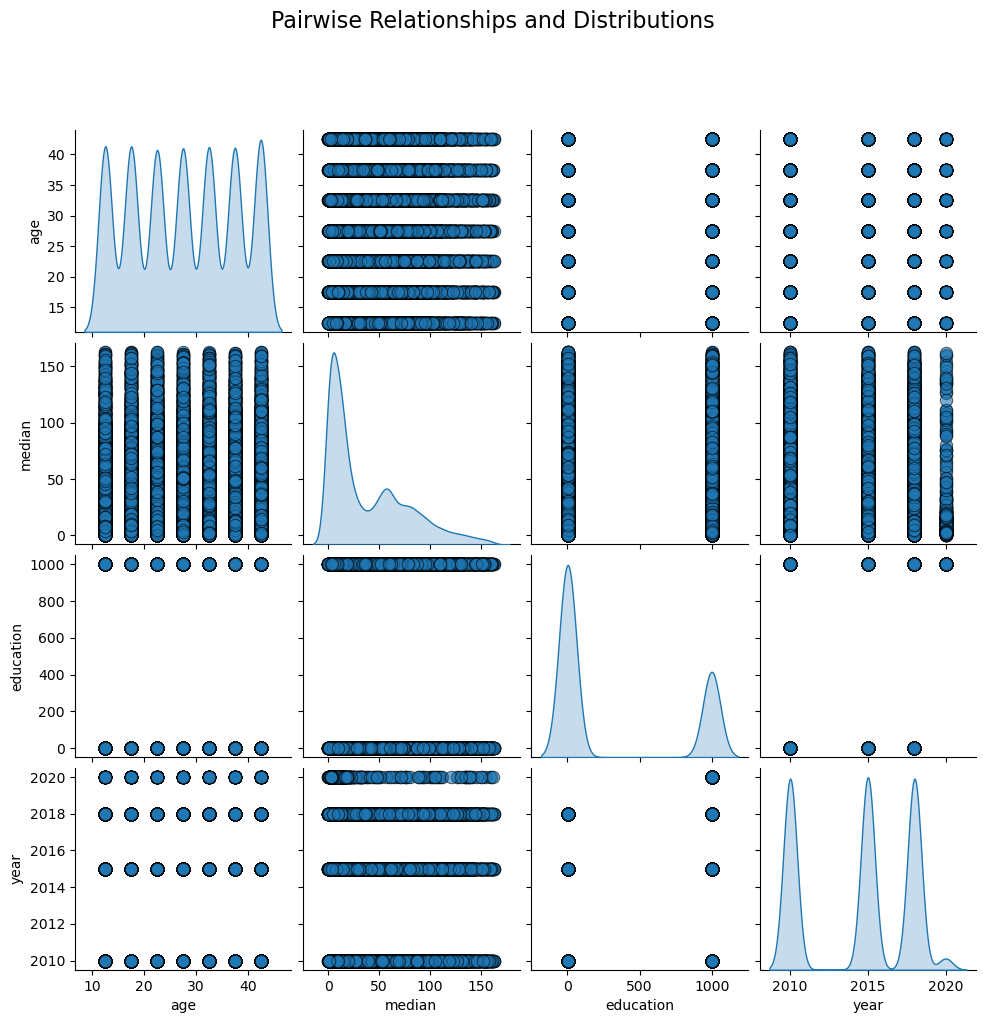

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
pairplot = sns.pairplot(
    further_reduced_data[['age', 'median', 'education', 'year']],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
)
plt.suptitle('Pairwise Relationships and Distributions', size=16, y=1.02)  
plt.subplots_adjust(top=0.9)  
plt.show()

**9. NUTRITIONAL INTAKE PATTERNS OF OLDER ADULTS IN THE USA AND CANADA**

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/451970532.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



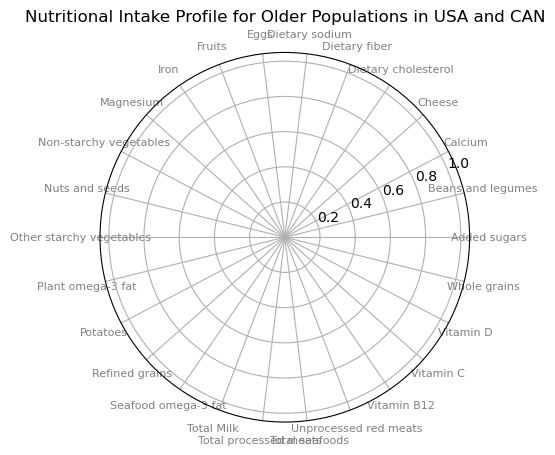

In [107]:
from math import pi
import matplotlib.pyplot as plt
subset = further_reduced_data[further_reduced_data['country'].isin(['USA', 'CAN']) & (further_reduced_data['age'] > 50)]
grouped = subset.groupby('Dietary Factor')['median'].mean().reset_index()
categories = grouped['Dietary Factor'].tolist()
N = len(categories)
values = grouped['median'].tolist()
values += values[:1]  
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
plt.title('Nutritional Intake Profile for Older Populations in USA and CAN')
plt.show()

**10. HIERARCHICAL BREAKDOWN OF DIETARY FACTORS ACROSS MACRONUTRIENTS AND MICRONUTRIENTS**

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1837/2901796381.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



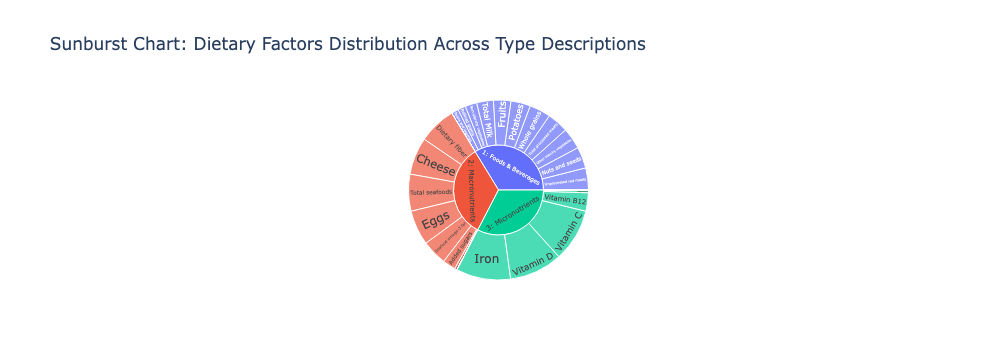

In [114]:
import plotly.express as px
import pandas as pd
data = further_reduced_data[['type_desc', 'Dietary Factor', 'median']]
grouped_data = data.groupby(['type_desc', 'Dietary Factor']).size().reset_index(name='count')
fig = px.sunburst(
    grouped_data,                     
    path=['type_desc', 'Dietary Factor'],  
    values='count',                     
    title="Sunburst Chart: Dietary Factors Distribution Across Type Descriptions"  
)
fig.show()

**11. CONSISTENT NUTRITION INTAKE PATTERNS ACROSS AGE GROUPS**

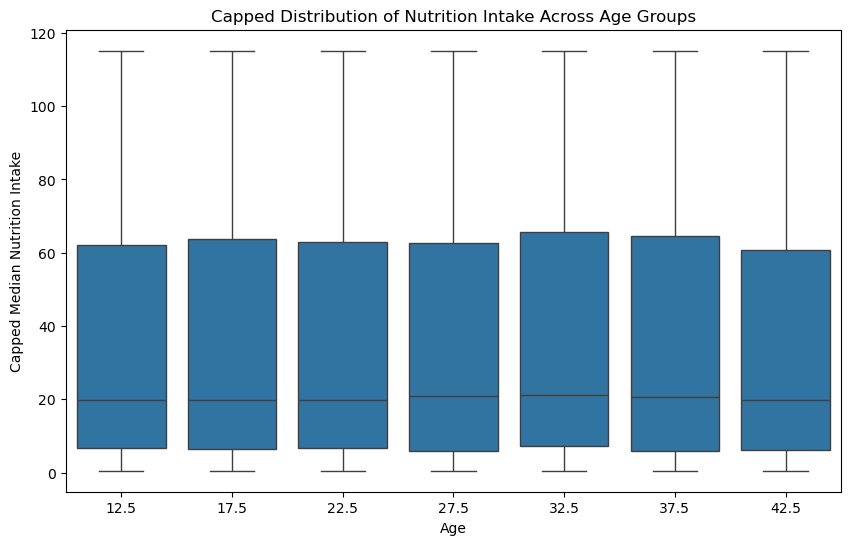

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cap_lower = further_reduced_data['median'].quantile(0.05)  
cap_upper = further_reduced_data['median'].quantile(0.95)  
data_capped = further_reduced_data.copy()
data_capped['median'] = data_capped['median'].clip(lower=cap_lower, upper=cap_upper)
Q1 = further_reduced_data['median'].quantile(0.25)
Q3 = further_reduced_data['median'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = further_reduced_data[
    (further_reduced_data['median'] >= lower_bound) & 
    (further_reduced_data['median'] <= upper_bound)
]
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='median', data=data_capped) 
plt.title('Capped Distribution of Nutrition Intake Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Capped Median Nutrition Intake')
plt.show()